# Data Analytics Project - Backtesting Model Predictions

# HEROMOTOCO STOCK MODELS EVALUATION

---

# 1. Importing Required Modules

In [1]:
import pandas as pd

# 2. Get required datasets

## 2.1. Get the orders dataset of HEROMOTOCO

In [2]:
orders_df = pd.read_csv('../Preprocess/Pair1/Pair1_orders.csv')
orders_df.head()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
1,2018-09-05,3145.399902,2772.300049,373.099854,1.220189,FLAT
2,2018-09-06,3164.850098,2783.100098,381.750000,1.330864,FLAT
3,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
4,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT


In [3]:
orders_df.tail()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
54,2018-11-27,2958.149902,2599.649902,358.500000,1.033390,FLAT
55,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,SHORT
56,2018-11-29,3016.800049,2724.000000,292.800049,0.192787,FLAT
57,2018-11-30,3055.199951,2745.699951,309.500000,0.406456,FLAT
58,2018-12-03,3039.899902,2736.000000,303.899902,0.334805,FLAT


## 2.2. Visualize the orders

Text(0, 0.5, 'zscore')

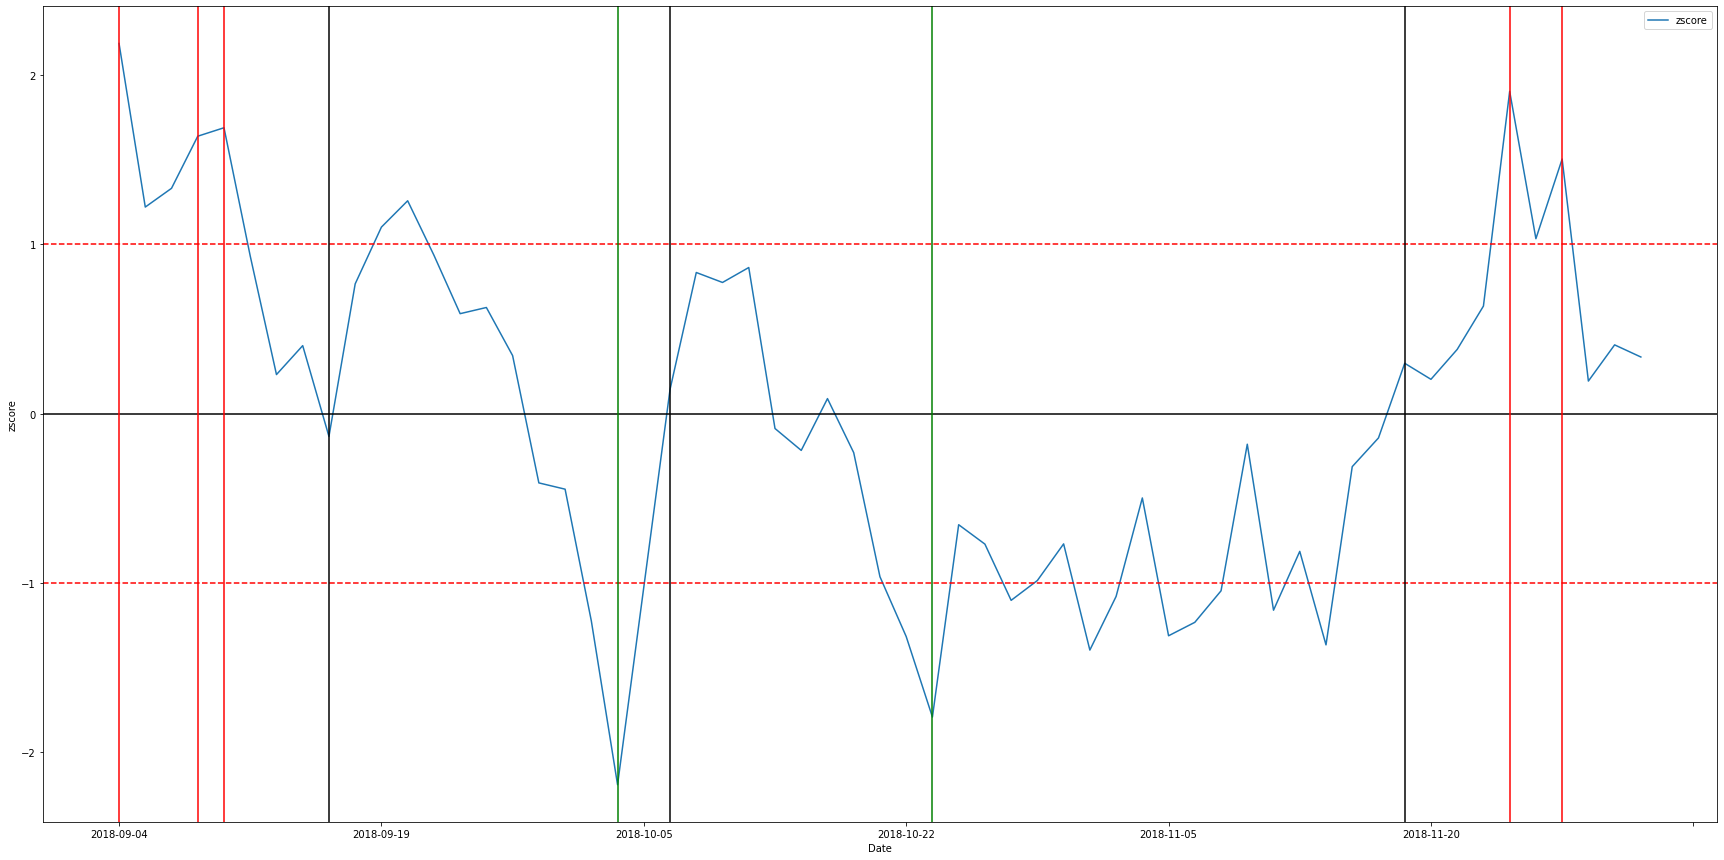

In [4]:
# Plotting the zscore of the Spread
orders_plt = orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")

orders_plt.set_ylabel("zscore")

__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 2.3. Get the predicitions dataset of HEROMOTOCO

In [5]:
predictions = pd.read_csv("../Models/Pair1/Hero_predicitions.csv")
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2018-09-04,3184.149902,3275.607148,3188.349761,NaN
1,2018-09-05,3145.399902,3271.913457,3184.550985,NaN
2,2018-09-06,3164.850098,3268.219767,3207.120261,NaN
3,2018-09-07,3329.350098,3264.526076,3202.465613,NaN
4,2018-09-10,3278.300049,3257.640557,3180.685059,NaN


In [6]:
predictions = predictions.dropna()
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
10,2018-09-19,3153.949951,3228.592895,3074.094955,3245.6753
11,2018-09-21,3175.199951,3221.205514,3069.602387,3238.7974
12,2018-09-24,3110.199951,3214.319995,3090.675243,3235.4749
13,2018-09-25,3112.600098,3210.626304,3106.579030,3228.9412
14,2018-09-26,3100.050049,3206.932614,3109.347466,3214.1301


## 2.4 Visualize the predictions by different models

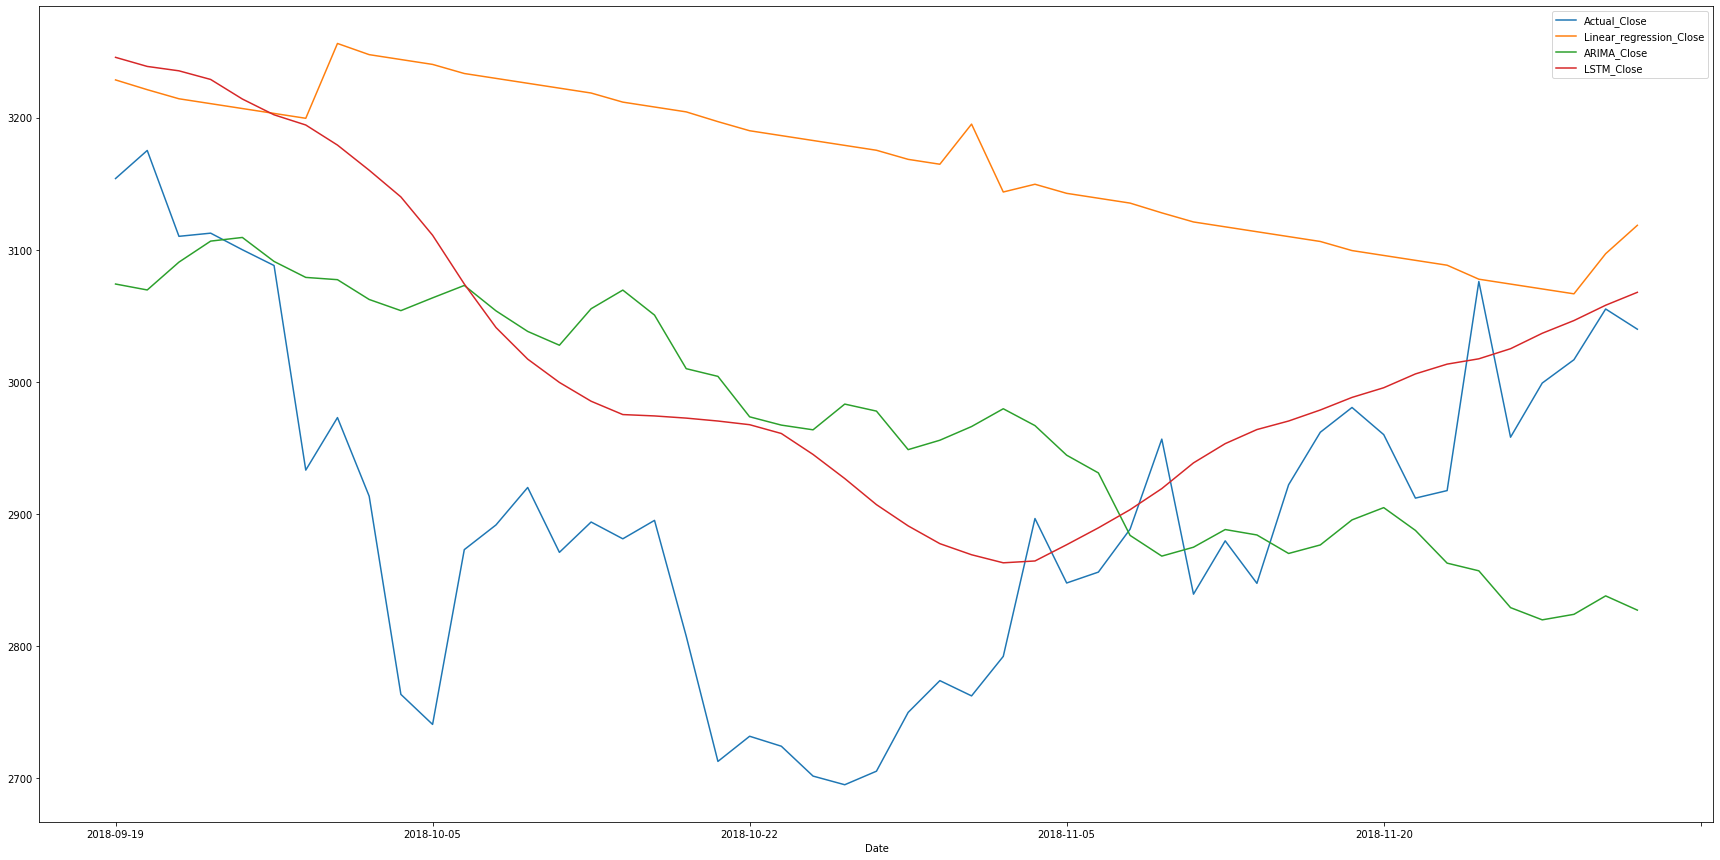

In [7]:
predictions.plot(x='Date', y=['Actual_Close', 'Linear_regression_Close', 'ARIMA_Close', 'LSTM_Close'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Price in rupees
- __Blue line__ - Actual data in the time period of correlation
- __Orange line__ - Linear Regression predictions for the time period
- __Red line__ - LSTM predictions for the time period
- __Green line__ - ARIMA predictions for the time period


---

# 3. Set parameters of trading

In [8]:
CAPITAL = 1000000
RISK = 20000 # Max risk allowed per trade (2% of capital)

- CAPITAL - Total amout of money willing to be spent.
- RISK - Amount to spend per trade (maximum).
- OPEN POSITION - Buy/Short shares of stock worth 20000.
- CLOSE POSITION - Buy/Sell shares to consolidate open positions and take profit/loss.
- TRADE_BOOK - Keeps track of all open positions.
- For the purpose of this experiment, we assume no brokerage costs, which is a fair assumption as many brokers (such as zerodha, robinhood, sharekhan, etc.) offer equity delivery at no cost.

---

# 4. Evaluate all individual orders

## 4.1. Display all orders which are not *FLAT*

In [9]:
not_flat_orders = orders_df[orders_df['Orders'] != 'FLAT']
not_flat_orders

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
3,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
4,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT
8,2018-09-17,3127.899902,2860.649902,267.250000,-0.134115,GET_OUT_OF_POSITION
19,2018-10-04,2763.500000,2657.000000,106.500000,-2.190844,LONG
21,2018-10-08,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
31,2018-10-23,2724.250000,2586.500000,137.750000,-1.791013,LONG
49,2018-11-19,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
53,2018-11-26,3076.000000,2649.500000,426.500000,1.903422,SHORT
55,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,SHORT


In [10]:
not_flat_orders = not_flat_orders.set_index('Date').reset_index()
not_flat_orders

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
1,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
2,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT
3,2018-09-17,3127.899902,2860.649902,267.250000,-0.134115,GET_OUT_OF_POSITION
4,2018-10-04,2763.500000,2657.000000,106.500000,-2.190844,LONG
5,2018-10-08,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
6,2018-10-23,2724.250000,2586.500000,137.750000,-1.791013,LONG
7,2018-11-19,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
8,2018-11-26,3076.000000,2649.500000,426.500000,1.903422,SHORT
9,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,SHORT


## 4.2 Flip all orders

In [11]:
def flip_orders(orders):
    
    flipped_orders = []
    
    for order in orders:
        if order == 'SHORT':
            flipped_orders.append('LONG')
        elif order == 'LONG':
            flipped_orders.append('SHORT')
        else:
            flipped_orders.append(order)
    
    return flipped_orders


In [12]:
# not_flat_orders['Orders'] = flip_orders(not_flat_orders['Orders'])
not_flat_orders

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
1,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
2,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT
3,2018-09-17,3127.899902,2860.649902,267.250000,-0.134115,GET_OUT_OF_POSITION
4,2018-10-04,2763.500000,2657.000000,106.500000,-2.190844,LONG
5,2018-10-08,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
6,2018-10-23,2724.250000,2586.500000,137.750000,-1.791013,LONG
7,2018-11-19,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
8,2018-11-26,3076.000000,2649.500000,426.500000,1.903422,SHORT
9,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,SHORT


## 4.3. Get predictions of dates where orders are placed

### 4.3.1. Filter rows in predictions to only include dates where orders are placed

In [13]:
not_flat_orders = not_flat_orders.set_index('Date')
not_flat_orders

,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
Date,,,,,
2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT
2018-09-17,3127.899902,2860.649902,267.250000,-0.134115,GET_OUT_OF_POSITION
2018-10-04,2763.500000,2657.000000,106.500000,-2.190844,LONG
2018-10-08,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
2018-10-23,2724.250000,2586.500000,137.750000,-1.791013,LONG
2018-11-19,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
2018-11-26,3076.000000,2649.500000,426.500000,1.903422,SHORT


In [14]:
predicitions = predictions.set_index('Date')
predicitions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
Date,,,,
2018-09-19,3153.949951,3228.592895,3074.094955,3245.6753
2018-09-21,3175.199951,3221.205514,3069.602387,3238.7974
2018-09-24,3110.199951,3214.319995,3090.675243,3235.4749
2018-09-25,3112.600098,3210.626304,3106.579030,3228.9412
2018-09-26,3100.050049,3206.932614,3109.347466,3214.1301
2018-09-27,3088.100098,3203.238923,3091.192800,3202.1770
2018-09-28,2933.250000,3199.545233,3079.107232,3194.4673
2018-10-01,2973.000000,3256.183242,3077.387647,3179.2627
2018-10-03,2913.500000,3247.717000,3062.400788,3160.2341


In [15]:
orders_predictions = predicitions.join(not_flat_orders)
orders_predictions = orders_predictions.dropna()
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
Date,,,,,,,,,
2018-10-04,2763.500000,3244.023309,3053.957941,3140.0308,2763.500000,2657.000000,106.500000,-2.190844,LONG
2018-10-08,2873.050049,3233.444100,3073.019614,3074.1184,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
2018-10-23,2724.250000,3186.429847,2967.310976,2960.9631,2724.250000,2586.500000,137.750000,-1.791013,LONG
2018-11-19,2980.649902,3099.418247,2895.559322,2988.2744,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
2018-11-26,3076.000000,3077.757966,2857.018042,3017.4937,3076.000000,2649.500000,426.500000,1.903422,SHORT
2018-11-28,2999.149902,3070.370585,2819.905033,3036.8232,2999.149902,2603.899902,395.250000,1.503591,SHORT


### 4.3.2 Remove columns in orders and predictions dataframe

In [16]:
orders_predictions = orders_predictions.drop(columns=['BAJAJ-AUTO_Close', 'HEROMOTOCO_Close', 'Spread', 'zscore'])
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-10-04,2763.500000,3244.023309,3053.957941,3140.0308,LONG
2018-10-08,2873.050049,3233.444100,3073.019614,3074.1184,GET_OUT_OF_POSITION
2018-10-23,2724.250000,3186.429847,2967.310976,2960.9631,LONG
2018-11-19,2980.649902,3099.418247,2895.559322,2988.2744,GET_OUT_OF_POSITION
2018-11-26,3076.000000,3077.757966,2857.018042,3017.4937,SHORT
2018-11-28,2999.149902,3070.370585,2819.905033,3036.8232,SHORT


### 4.3.3 Create function to evaluate orders

In [17]:
def evaluate_orders(orders_df):
    
    actual_profits = []
    LR_profits = []
    ARIMA_profits = []
    LSTM_profits = []
    shares = []
    
    num_orders = len(orders_df["Orders"])
    
    for i in range(num_orders):
        
        if i == num_orders - 1:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
            break
        
        position = orders_df['Orders'][i]
        close = orders_df['Actual_Close'][i]
        LR_close = orders_df['Linear_regression_Close'][i]
        ARIMA_close = orders_df['ARIMA_Close'][i]
        LSTM_close = orders_df['LSTM_Close'][i]
        
        print()
        
        print("ORDER: ", i, close, LR_close, ARIMA_close, LSTM_close, position)
        
        if position == 'LONG' or position == 'SHORT':
            
            no_of_shares = 20000//close
            
            for j in range(i+1, num_orders):
                
                if (j == num_orders - 1) or orders_df['Orders'][j] == 'GET_OUT_OF_POSITION':
                    
                    actual_profit = orders_df['Actual_Close'][j] - orders_df['Actual_Close'][i]
                    LR_profit = orders_df['Linear_regression_Close'][j] - orders_df['Linear_regression_Close'][i]
                    ARIMA_profit = orders_df['ARIMA_Close'][j] - orders_df['ARIMA_Close'][i]
                    LSTM_profit = orders_df['LSTM_Close'][j] - orders_df['LSTM_Close'][i]
                    
                    actual_profit *= no_of_shares
                    LR_profit *= no_of_shares
                    ARIMA_profit *= no_of_shares
                    LSTM_profit  *= no_of_shares
                    
                    if position == 'SHORT':
                        actual_profit *= -1
                        LR_profit *= -1
                        ARIMA_profit *= -1
                        LSTM_profit *= -1
                    
                    print('number of shares: ', no_of_shares)
                    print('actual profit: ', actual_profit)
                    print('LR profit: ', LR_profit)
                    print('ARIMA profit: ', ARIMA_profit)
                    print('LSTM profit: ', LSTM_profit)
                    
                    shares.append(no_of_shares)
                    actual_profits.append(actual_profit)
                    LR_profits.append(LR_profit)
                    ARIMA_profits.append(ARIMA_profit)
                    LSTM_profits.append(LSTM_profit)
                    
                    break
        else:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
        
        print()
    
    return actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares
                    

In [18]:
actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares = evaluate_orders(orders_predictions)


ORDER:  0 2763.5 3244.023309199373 3053.957941238375 3140.0308 LONG
number of shares:  7.0
actual profit:  766.850341796875
LR profit:  -74.05446641520939
ARIMA profit:  133.43170701528607
LSTM profit:  -461.38680000000113


ORDER:  1 2873.050048828125 3233.444099711486 3073.01961366913 3074.1184 GET_OUT_OF_POSITION


ORDER:  2 2724.25 3186.429846971529 2967.310975671629 2960.9631 LONG
number of shares:  7.0
actual profit:  1794.79931640625
LR profit:  -609.081196902323
ARIMA profit:  -502.26157376900255
LSTM profit:  191.17909999999893


ORDER:  3 2980.64990234375 3099.4182474140543 2895.559322276057 2988.2744 GET_OUT_OF_POSITION


ORDER:  4 3076.0 3077.757966312813 2857.0180423359666 3017.4937 SHORT
number of shares:  6.0
actual profit:  461.1005859375
LR profit:  44.32428645249729
ARIMA profit:  222.67805476161902
LSTM profit:  -115.97699999999895



In [19]:
actual_profits

[766.850341796875, 0, 1794.79931640625, 0, 461.1005859375, 0]

In [20]:
LR_profits

[-74.05446641520939, 0, -609.081196902323, 0, 44.32428645249729, 0]

In [21]:
LSTM_profits

[-461.38680000000113, 0, 191.17909999999893, 0, -115.97699999999895, 0]

In [22]:
shares

[7.0, 0, 7.0, 0, 6.0, 0]

In [23]:
ARIMA_profits

[133.43170701528607, 0, -502.26157376900255, 0, 222.67805476161902, 0]

### 4.3.4 Adding evaluated orders to dataframe

In [24]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-10-04,2763.500000,3244.023309,3053.957941,3140.0308,LONG
2018-10-08,2873.050049,3233.444100,3073.019614,3074.1184,GET_OUT_OF_POSITION
2018-10-23,2724.250000,3186.429847,2967.310976,2960.9631,LONG
2018-11-19,2980.649902,3099.418247,2895.559322,2988.2744,GET_OUT_OF_POSITION
2018-11-26,3076.000000,3077.757966,2857.018042,3017.4937,SHORT
2018-11-28,2999.149902,3070.370585,2819.905033,3036.8232,SHORT


In [25]:
orders_predictions['Shares'] = shares
orders_predictions['Actual_profit'] = actual_profits
orders_predictions['Linear_regression_profit'] = LR_profits
orders_predictions['ARIMA_profit'] = ARIMA_profits
orders_predictions['LSTM_profit'] = LSTM_profits

In [26]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
Date,,,,,,,,,,
2018-10-04,2763.500000,3244.023309,3053.957941,3140.0308,LONG,7.0,766.850342,-74.054466,133.431707,-461.3868
2018-10-08,2873.050049,3233.444100,3073.019614,3074.1184,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.0000
2018-10-23,2724.250000,3186.429847,2967.310976,2960.9631,LONG,7.0,1794.799316,-609.081197,-502.261574,191.1791
2018-11-19,2980.649902,3099.418247,2895.559322,2988.2744,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.0000
2018-11-26,3076.000000,3077.757966,2857.018042,3017.4937,SHORT,6.0,461.100586,44.324286,222.678055,-115.9770
2018-11-28,2999.149902,3070.370585,2819.905033,3036.8232,SHORT,0.0,0.000000,0.000000,0.000000,0.0000


### 4.3.5 Visualizing the profits

In [27]:
orders_predictions = orders_predictions.reset_index()

In [28]:
orders_predictions

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
0,2018-10-04,2763.500000,3244.023309,3053.957941,3140.0308,LONG,7.0,766.850342,-74.054466,133.431707,-461.3868
1,2018-10-08,2873.050049,3233.444100,3073.019614,3074.1184,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.0000
2,2018-10-23,2724.250000,3186.429847,2967.310976,2960.9631,LONG,7.0,1794.799316,-609.081197,-502.261574,191.1791
3,2018-11-19,2980.649902,3099.418247,2895.559322,2988.2744,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.0000
4,2018-11-26,3076.000000,3077.757966,2857.018042,3017.4937,SHORT,6.0,461.100586,44.324286,222.678055,-115.9770
5,2018-11-28,2999.149902,3070.370585,2819.905033,3036.8232,SHORT,0.0,0.000000,0.000000,0.000000,0.0000


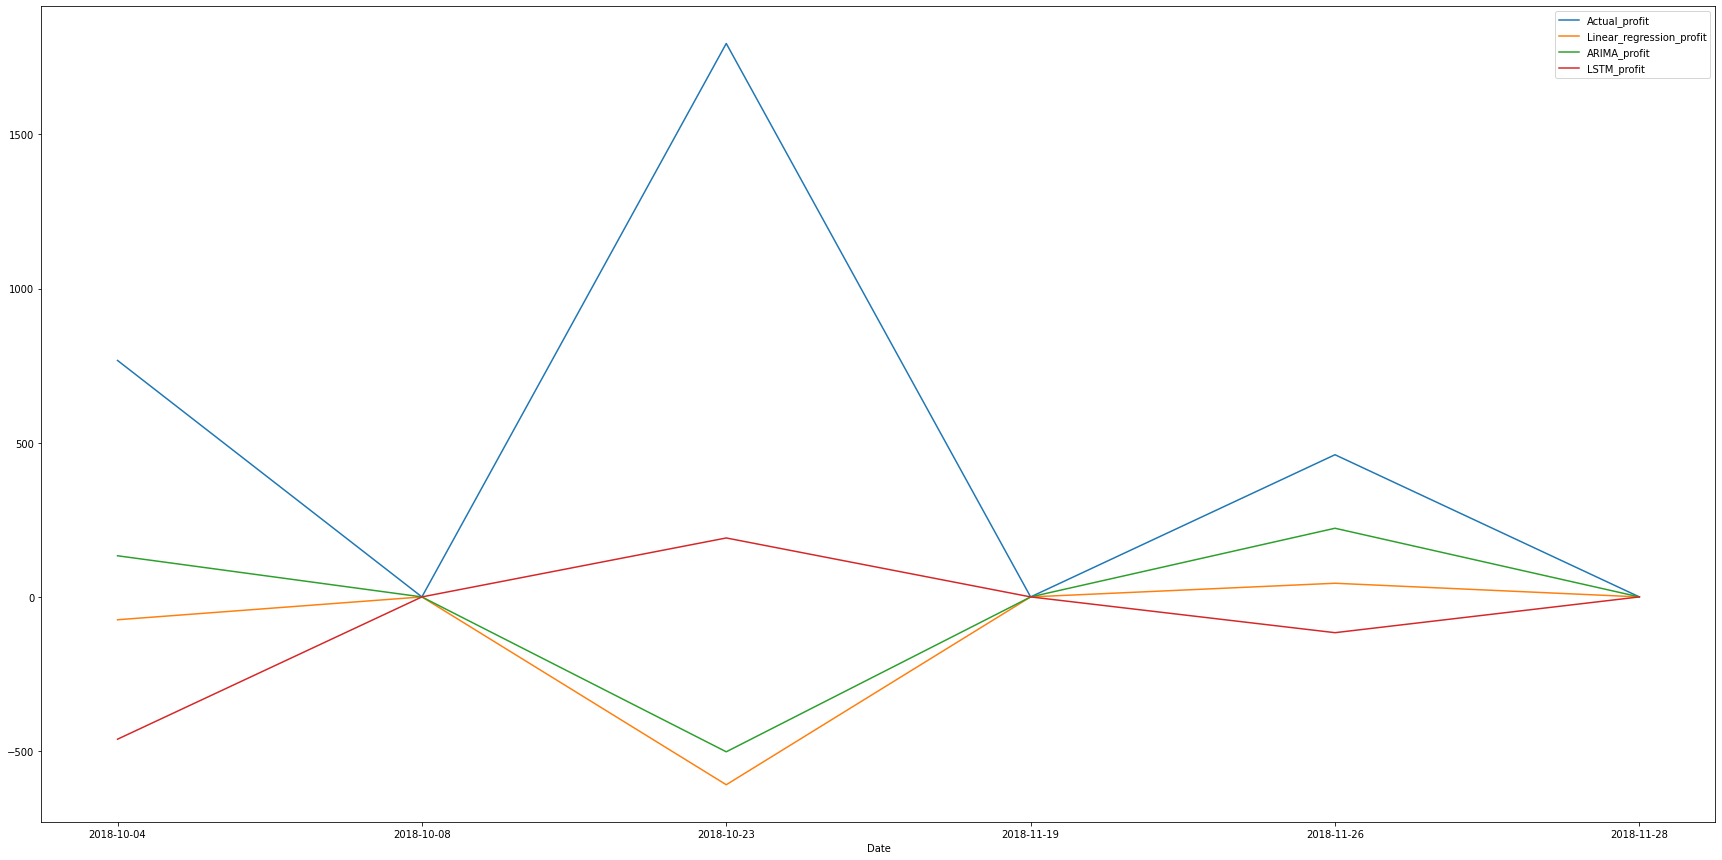

In [29]:
orders_predictions.plot(x='Date', y=['Actual_profit', 'Linear_regression_profit', 'ARIMA_profit', 'LSTM_profit'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Profit
- __Blue line__ - Actual profit
- __Orange line__ - Linear Regression predicted profit
- __Green line__ - ARIMA predicted profit
- __Red line__ - LSTM predicted profit

---